In [2]:
%matplotlib inline
import collections
import numpy as np
import pandas as pd
import torch
import seaborn as sns
from torch import nn
from torch.utils import data
from d2l import torch as d2l
import plotly.express as px

# 一、数据分析

## 读取数据

In [4]:
data_path = '../data/california-house-prices/'

train_data = pd.read_csv(data_path + 'train.csv')
test_data = pd.read_csv(data_path + 'test.csv')
print(train_data.shape)
print(test_data.shape)
train_data.iloc[0:10]

(47439, 41)
(31626, 40)


,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA
5,5,922 E Channel St,221000.0,"922 E Channel St, Stockton, CA 95202 is a sing...",SingleFamily,1905.0,Wall Furnace,Window Unit(s),Carport,3576.0,...,Carport,208080.0,2531.0,2019-10-30,224900.0,2017-12-28,200000.0,Stockton,95202,CA
6,6,1926 Mellon Ave,1589000.0,Two newly built modern farm houses in super ho...,Unknown,1926.0,Central,Central Air,"Driveway, Garage",NaN,...,"Driveway, Garage",1589000.0,19220.0,2019-10-28,1599000.0,2018-03-14,500000.0,Los Angeles,90039,CA
7,7,9013 N Valley Rd,480000.0,"9013 N Valley Rd, Taylorsville, CA 95983 is a ...",SingleFamily,2005.0,"Forced air, Propane / Butane, Solar",Other,"Carport, Garage - Attached, Covered",1771149.6,...,"Carport, Garage - Attached, Covered",NaN,NaN,2019-10-18,499000.0,NaN,NaN,Taylorsville,95983,CA
8,8,225 26th Ave #2,1590000.0,New Refinished Bathrooms! Come take a NEW look...,Condo,2001.0,NaN,NaN,"Attached, Enclosed, Garage Door Opener, Interi...",NaN,...,"Attached, Enclosed, Garage Door Opener, Interi...",1087088.0,13793.0,2019-07-18,1650000.0,NaN,NaN,San Francisco,94121,CA
9,9,612 Valencia Rd,1275000.0,Sprawling one level home on 1.5 acres with lev...,SingleFamily,1973.0,"Gas, Heating - 2+ Zones, Wall Furnace, Central...",None,"Garage, Garage - Attached",66211.2,...,"Garage, Garage - Attached",167767.0,1909.0,2019-10-28,1050000.0,NaN,NaN,Aptos,95003,CA


## 获取统计信息

In [1]:
print(train_data.describe())
tr

NameError: name 'train_data' is not defined

In [26]:
print(test_data.describe())

                 Id    Year built           Lot     Bathrooms  Full bathrooms  \
count  31626.000000  30729.000000  2.281800e+04  29681.000000    26563.000000   
mean   63251.500000   1971.956295  5.640277e+05      2.444156        2.108233   
std     9129.784143     97.838183  2.778430e+07      1.118933        0.910245   
min    47439.000000      0.000000  0.000000e+00      0.000000        1.000000   
25%    55345.250000   1956.000000  5.400000e+03      2.000000        2.000000   
50%    63251.500000   1978.000000  7.152500e+03      2.000000        2.000000   
75%    71157.750000   1996.000000  1.089000e+04      3.000000        2.000000   
max    79064.000000   9999.000000  2.217378e+09     24.000000       24.000000   

       Total interior livable area  Total spaces  Garage spaces  \
count                 30274.000000  30875.000000   30876.000000   
mean                   1904.238290      2.305943       1.990640   
std                    3628.506263     18.720968      18.645971   
mi

In [19]:
print(train_data.quantile(0.001))

Id                                634.500
Sold Price                     150000.000
Year built                       1900.000
Lot                               767.640
Bathrooms                           1.000
Full bathrooms                      1.000
Total interior livable area       589.331
Total spaces                        0.000
Garage spaces                       0.000
Elementary School Score             2.000
Elementary School Distance          0.100
Middle School Score                 2.000
Middle School Distance              0.200
High School Score                   2.000
High School Distance                0.200
Tax assessed value              42250.668
Annual tax amount                 756.414
Listed Price                   165000.000
Last Sold Price                 64000.000
Zip                             90003.000
Name: 0.001, dtype: float64


<AxesSubplot:>

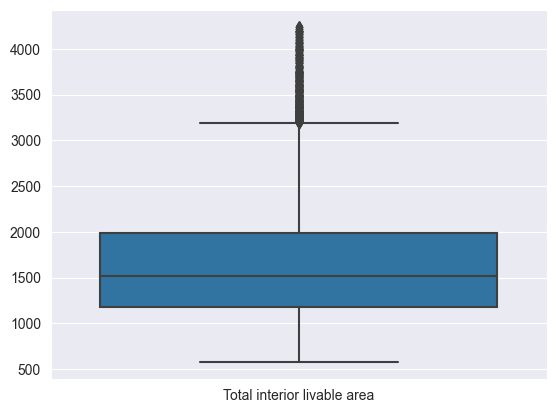

In [46]:
numeric_cols = train_data.dtypes[train_data.dtypes != 'object'].index[1:]
sns.boxplot(data=train_data.loc[:, numeric_cols[5:6]])

## 获取相关信息

In [27]:
train_data.corr()['Sold Price'].sort_values()

Elementary School Distance    -0.166126
High School Distance          -0.164779
Year built                    -0.153159
Lot                           -0.102001
Id                            -0.089965
Middle School Distance        -0.082399
Zip                           -0.006106
Total spaces                   0.030024
Garage spaces                  0.049715
High School Score              0.287986
Middle School Score            0.317148
Elementary School Score        0.352972
Full bathrooms                 0.361112
Bathrooms                      0.382401
Total interior livable area    0.489769
Tax assessed value             0.573898
Annual tax amount              0.583092
Last Sold Price                0.693435
Listed Price                   0.955705
Sold Price                     1.000000
Name: Sold Price, dtype: float64

# 二、数据处理

In [92]:
# 处理数值特征
numeric_cols = train_data[1:].dtypes[train_data.dtypes != 'object'].index[1:]

# 过滤各个特征取值不正常的记录
for col in numeric_cols:
    train_data = train_data.drop(train_data[col].nlargest(int(0.005 * len(train_data))).index)
    train_data = train_data.drop(train_data[col].nsmallest(int(0.005 * len(train_data))).index)

In [94]:
print(train_data.describe())

                 Id    Sold Price    Year built           Lot     Bathrooms  \
count  39224.000000  3.922400e+04  38517.000000  2.769200e+04  36587.000000   
mean   24666.831251  1.131771e+06   1965.730119  2.349785e+04      2.264083   
std    13332.879946  7.428282e+05     30.311366  8.123688e+04      0.914846   
min        4.000000  1.200000e+05   1860.000000  4.356000e+02      0.000000   
25%    13243.500000  6.000000e+05   1947.000000  4.941500e+03      2.000000   
50%    24889.500000  9.600000e+05   1967.000000  6.316000e+03      2.000000   
75%    36205.250000  1.460000e+06   1988.000000  9.199000e+03      3.000000   
max    47438.000000  6.950000e+06   2020.000000  1.114700e+06      6.000000   

       Full bathrooms  Total interior livable area  Total spaces  \
count    33395.000000                 37390.000000  38622.000000   
mean         2.003773                  1698.976598      1.333256   
std          0.757062                   733.092387      1.230231   
min          1.0

In [93]:
# 计算相关系数，选择高相关性的特征
cols_corr = train_data[numeric_cols].corr()
numeric_cols = []
target_cols = collections.deque(['Sold Price'])
while target_cols:
    target_col = target_cols.popleft()
    for col, corr in cols_corr[target_col].items():
        if abs(corr) > 0.1 and col not in numeric_cols:
            numeric_cols.append(col)
            target_cols.append(col)
numeric_cols.remove('Sold Price')
print(len(numeric_cols))
print(numeric_cols)

18
['Year built', 'Bathrooms', 'Full bathrooms', 'Total interior livable area', 'Elementary School Score', 'Elementary School Distance', 'Middle School Score', 'High School Score', 'High School Distance', 'Tax assessed value', 'Annual tax amount', 'Listed Price', 'Last Sold Price', 'Lot', 'Total spaces', 'Garage spaces', 'Middle School Distance', 'Zip']


In [95]:
# 处理非数值特征
# string_cols = ['Type', 'Heating', 'Cooling', 'Region', 'City', 'Flooring']
string_cols = ['Type']
selected_cols = numeric_cols + string_cols
all_features = pd.concat((train_data[selected_cols], test_data[selected_cols]))

# 特征编码
all_features = pd.get_dummies(all_features, dummy_na=True, columns=string_cols)

In [96]:
# 对各个特征进行标准化、缺失填充
all_features[numeric_cols] = all_features[numeric_cols].apply(
    lambda x: ((x - x.mean()) / x.std())
)
all_features = all_features.fillna(0)

In [97]:
# 处理为迭代对象
batch_size = 32
all_features = torch.tensor(all_features.values, dtype=torch.float32)
all_labels = torch.tensor(train_data['Sold Price'].values.reshape((-1, 1)), dtype=torch.float32)
# train_num = int(train_data.shape[0] * 0.9)
# train_set = data.TensorDataset(all_features[:train_num], all_labels[:train_num])
# val_set = data.TensorDataset(all_features[train_num: len(train_data)], all_labels[train_num:])
test_set = data.TensorDataset(all_features[len(train_data):])
# train_iter = data.DataLoader(train_set, batch_size, shuffle=True)
# val_iter = data.DataLoader(val_set, batch_size, shuffle=False)
test_iter = data.DataLoader(test_set, batch_size, shuffle=False)
train_val_data = (all_features[:len(train_data)], all_labels)

In [98]:
# k折交叉验证
def get_k_fold_data(data_set, k, i):
    assert k > 1
    num_samples = len(data_set[0])
    fold_size = num_samples // k
    features, labels = data_set
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, min((j + 1) * fold_size, num_samples - 1))
        X_part, y_part = features[idx], labels[idx]
        if j == i:
            X_val, y_val = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_val, y_val

# 三、模型定义

In [99]:
class Model(nn.Module):
    def __init__(self, in_features, out_features, dropout=0):
        super(Model, self).__init__()
        self.linear1 = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        self.linear2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.linear3 = nn.Sequential(
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU()
        )
        self.linear4 = nn.Sequential(
            nn.Linear(32, 1),
        )
    def forward(self, X):
        X = self.linear1(X)
        X = self.linear2(X)
        X = self.linear3(X)
        y = self.linear4(X)
        return y

In [100]:
class LogRmse:
    def __init__(self):
        self.loss_fn = nn.MSELoss()

    def __call__(self, y_hat, y):
        y_hat = torch.clamp(y_hat, 1, float('inf'))
        loss = torch.sqrt(self.loss_fn(torch.log(y_hat), torch.log(y)))
        return loss

# 四、模型训练

In [101]:
def train(model, train_iter, val_iter, loss_fn, optimizer, num_epochs):
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, num_epochs],
                            ylim=[0, 0.3], legend=['train_loss', 'val_loss'])
    metrics = d2l.Accumulator(4)
    for epoch in range(num_epochs):
        metrics.reset()
        model.train()
        for X, y in train_iter:
            y_hat = model(X)
            loss = loss_fn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            metrics.add(loss, 1, 0, 0)
        model.eval()
        for X, y in val_iter:
            y_hat = model(X)
            loss = loss_fn(y_hat, y)
            metrics.add(0, 0, loss, 1)
        animator.add(epoch + 1, (metrics[0] / metrics[1], metrics[2] / metrics[3]))
    print(f'log_rmse train loss: {metrics[0] / metrics[1]}')
    print(f'log_rmse val loss: {metrics[2] / metrics[3]}')
    return metrics[0] / metrics[1], metrics[2] / metrics[3]

In [102]:
def train_k_fold(train_val_data, num_epochs, num_folds, lr, in_features,
                 out_features, dropout):
    models = []
    val_losses = []
    for i in range(num_folds):
        print(f'Training the {i}th fold.')
        train_features, train_labels, val_features, val_labels = \
            get_k_fold_data(train_val_data, num_folds, i)
        train_set = data.TensorDataset(train_features, train_labels)
        val_set = data.TensorDataset(val_features, val_labels)
        train_iter = data.DataLoader(train_set, batch_size, shuffle=True)
        val_iter = data.DataLoader(val_set, batch_size, shuffle=False)

        model = Model(in_features, out_features, dropout)
        loss_fn = LogRmse()
        optimizer = torch.optim.Adam(model.parameters(), lr)
        train_loss, val_loss = train(model, train_iter, val_iter, loss_fn,
                                     optimizer, num_epochs)
        models.append(model)
        val_losses.append(val_loss)
    print(f'best val loss: {min(val_losses)}')
    return models, val_losses

log_rmse train loss: 0.18891873108628005
log_rmse val loss: 0.2233879132505737
best val loss: 0.17762267419686148


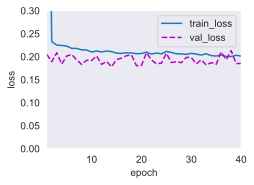

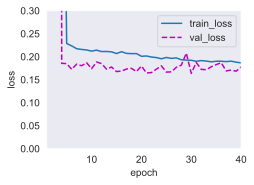

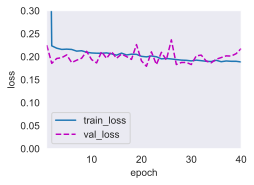

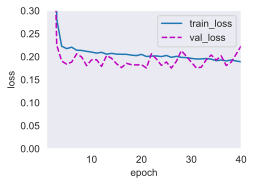

In [105]:
lr = 1
dropout = 0.2
in_features = all_features.shape[1]
out_features = 1
num_epochs = 40
num_folds = 4
print(in_features)

models, val_loss = train_k_fold(train_val_data, num_epochs, num_folds, lr,
                      in_features, out_features, dropout)

 # 五、模型推理

In [106]:
def predict(model, test_iter, test_data):
    model.eval()
    predicts = []
    with torch.no_grad():
        for X, in test_iter:
            y_hat = model(X).cpu().numpy()
            predicts.extend(y_hat.reshape(-1))
    test_data['Sold Price'] = pd.Series(predicts)
    submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
    submission.to_csv('./submission.csv', index=False)

In [107]:
predict(models[val_loss.index(min(val_loss))], test_iter, test_data)

In [52]:
def predict_k_models(models, test_iter, test_data):
    for model in models:
        model.eval()
    predicts = []
    with torch.no_grad():
        for X, in test_iter:
            y_hat = np.zeros((X.shape[0], 1))
            for model in models:
                y_hat += (model(X).detach().numpy())
            predicts.append(y_hat.reshape(-1) / len(models))
    predicts = np.concatenate(predicts, axis=0)
    test_data['Sold Price'] = pd.Series(predicts)
    submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
    submission.to_csv('./submission.csv', index=False)

In [53]:
predict_k_models(models, test_iter, test_data)